### The chosen features 
Status (0.41 correlation with target)
Freq. of use (0.40 correlation with target)
Churn (0.29 correlation with target)
Plan_pre-paid (-0.25 correlation with target)

### Motivation

- These features have the strongest correlations with Customer Value while maintaining relatively lower correlations with each other
- Exclude Distinct Called Numbers despite its 0.28 correlation with Customer Value because it's too strongly correlated with Freq. of use
- Include Plan_pre-paid because it provides unique information (low correlations with other selected features)
- Avoid including highly correlated feature pairs to prevent multicollinearity

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading data...

Training LRM3 model...

Evaluating LRM3 performance...

LRM3 Performance Metrics:
R² Score: 0.2599
Mean Squared Error: 194069.4574
Root Mean Squared Error: 440.5332
Mean Absolute Error: 323.8929


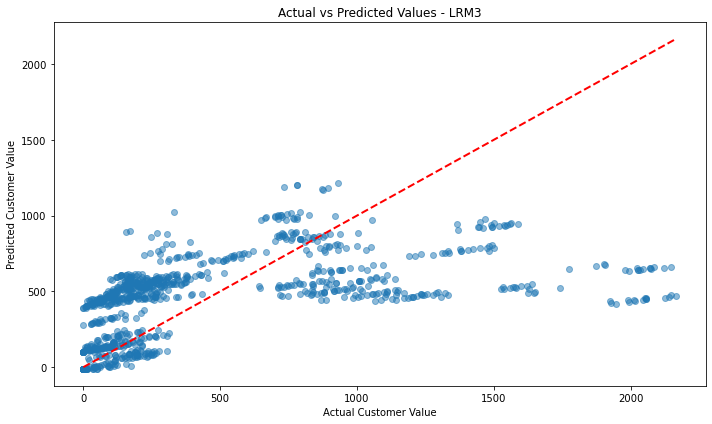

In [1]:
import pandas as pd
from models.LinearRegressionModel import LinearRegressionModel


def main():
    """
    Implementation of LRM3: predicting Customer Value using all independent attributes
    """
    # Load the prepared data
    print("Loading data...")
    train_df = pd.read_csv('../data/train.csv')
    test_df  = pd.read_csv('../data/test.csv')
   
    features = ['Freq. of use', 'Status', 'Churn', 'Plan_pre-paid'] 
    # These features show strong correlation with Customer Value
    X_train = train_df[features]
    y_train = train_df['Customer Value']
    X_test = test_df[features]
    y_test = test_df['Customer Value']
    
    # Create and train LRM1
    print("\nTraining LRM3 model...")
    lrm2 = LinearRegressionModel(model_name="LRM3")
    lrm2.fit(X_train, y_train)
    
    # Evaluate the model
    print("\nEvaluating LRM3 performance...")
    metrics, predictions = lrm2.evaluate(X_test, y_test)
    
    # Print results
    print("\nLRM3 Performance Metrics:")
    print(f"R² Score: {metrics['r2_score']:.4f}")
    print(f"Mean Squared Error: {metrics['mse']:.4f}")
    print(f"Root Mean Squared Error: {metrics['rmse']:.4f}")
    print(f"Mean Absolute Error: {metrics['mae']:.4f}")

    # Plot predictions
    lrm2.plot_predictions(y_test, predictions)

if __name__ == "__main__":
    main()

### Analysis of LRM3 Model Performance

1. Looking at the key metrics relative to LRM1 (our baseline with all features), we observe:
   - R² score decreased from 0.2943 to 0.2599, representing an 11.7% reduction in explanatory power. This decline is notably less severe than what we saw with LRM2 (which had a 42.7% decrease).
   - Mean Squared Error increased modestly from 185,037 to 194,069 (about 4.9% worse)
   - RMSE increased from 430.16 to 440.53 (about 2.4% worse)
   - Mean Absolute Error increased slightly from 319.39 to 323.89 (about 1.4% worse)

2. The scatter plot reveals some interesting patterns:
   - Like our previous models, LRM3 struggles with high-value customers, showing systematic underprediction for values above 1000
   - However, we see better prediction consistency in the 0-1000 range compared to LRM2, suggesting our selected features are capturing more of the underlying patterns in this range
   - The clustering of predictions shows less scatter than LRM2, indicating more stable predictions overall

**This leads to several important insights:**

1. The correlation-based feature selection approach (using Status, Freq. of use, Churn, and Plan_pre-paid) proves more effective than the two-feature model of LRM2, but still falls short of capturing all the complexity present in LRM1. This suggests that while correlation is a useful guide for feature selection, it shouldn't be the only criterion.

2. The consistent underprediction of high-value customers across all three models suggests that the relationship between our features and Customer Value might be non-linear, particularly at higher values. This indicates that linear regression might not be the most appropriate model for this particular prediction task.